In [22]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load datasets
train_df = pd.read_csv("D:\\Assignments questions\\Logistic Regression\\Titanic_train.csv")
test_df = pd.read_csv("D:\\Assignments questions\\Logistic Regression\\Titanic_test.csv")
(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
(test_df)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

Train Data Shape: (891, 12)
Test Data Shape: (418, 11)


In [25]:
# ======================
# 2. Basic Exploration
# ======================
print("\n--- Info ---")
print(train_df.info())




--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [26]:
print("\n--- Missing Values ---")
print(train_df.isnull().sum())




--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
print("\n--- Summary Statistics ---")
print(train_df.describe(include="all"))


--- Summary Statistics ---
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
cou

In [28]:
# 3. Feature Types
# ======================
categorical_features = train_df.select_dtypes(include=['object']).columns
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Features:", list(categorical_features))
print("Numerical Features:", list(numerical_features))


Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [29]:
print(categorical_features.isnull().sum())
print(numerical_features.isnull().sum())


0
0


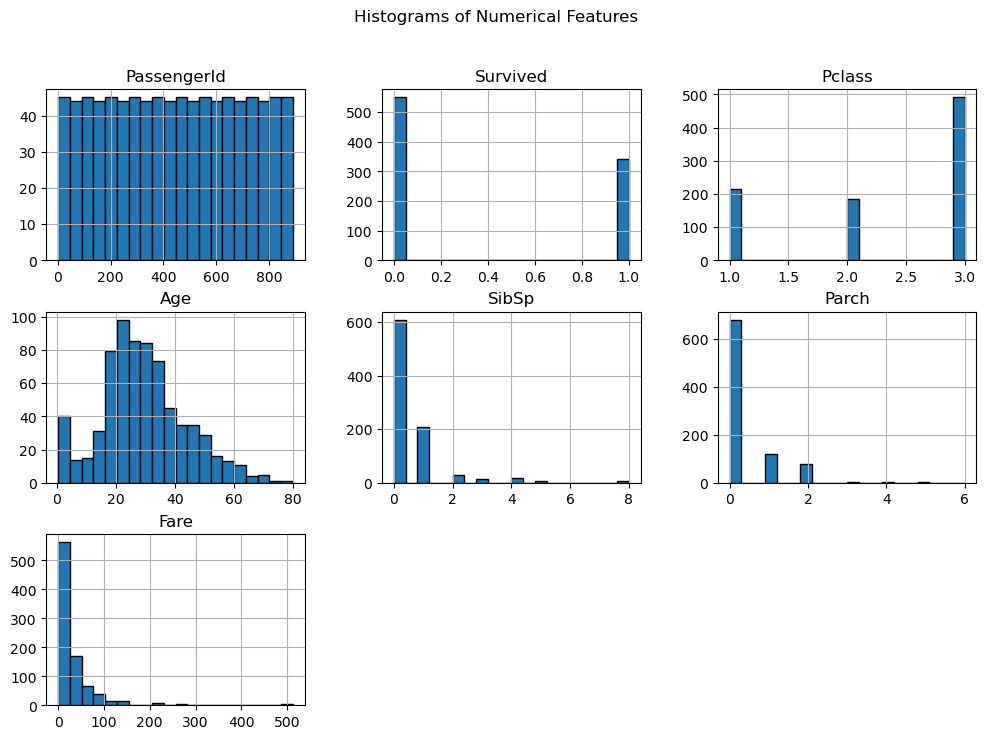

In [30]:
# ======================
# 4. Visualizations
# ======================

# Histogram for numerical features
train_df[numerical_features].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

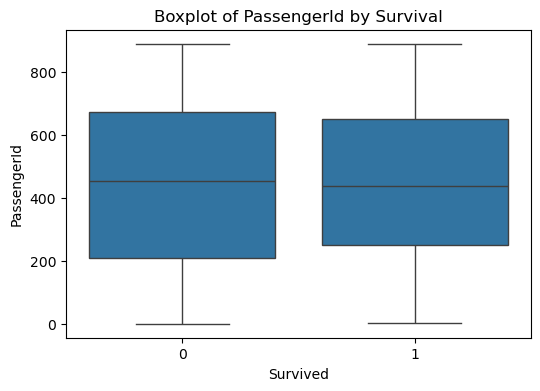

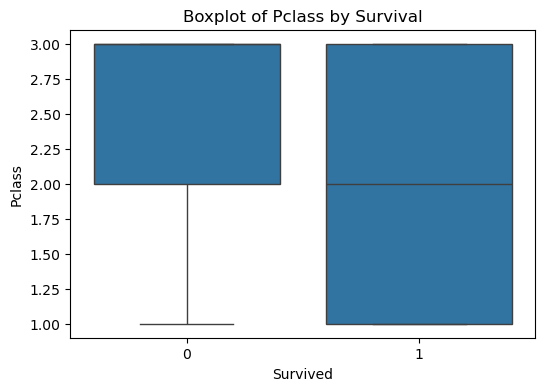

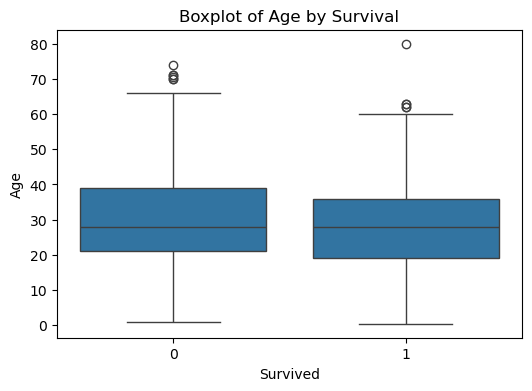

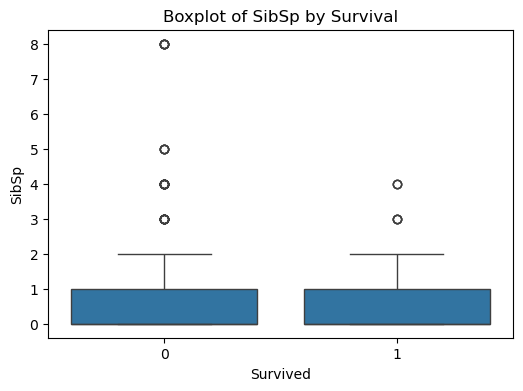

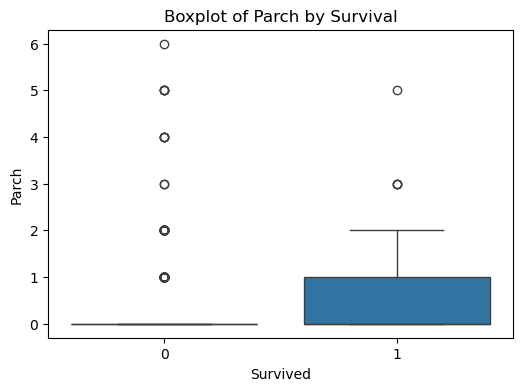

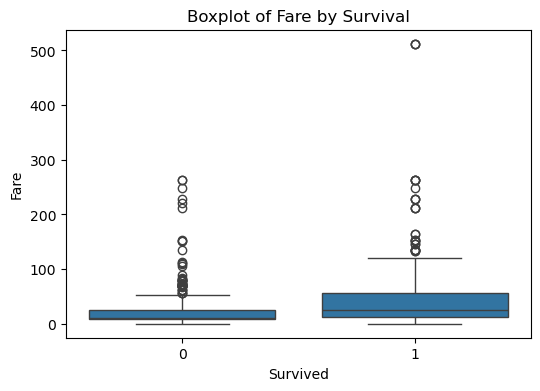

In [31]:
# Boxplots for numerical features grouped by survival
for col in numerical_features:
    if col != "Survived":  # Survived is target variable
        plt.figure(figsize=(6, 4))
        sns.boxplot(x="Survived", y=col, data=train_df)
        plt.title(f"Boxplot of {col} by Survival")
        plt.show()

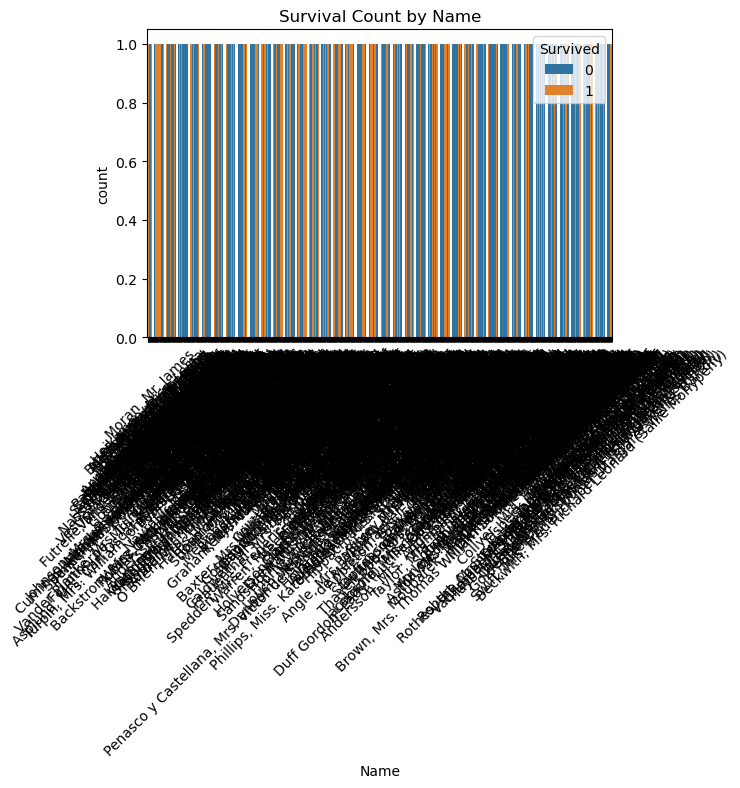

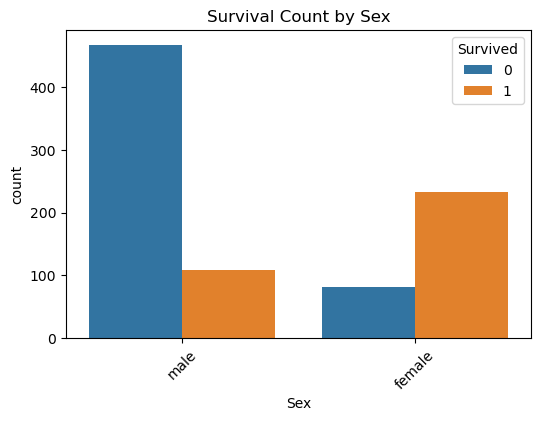

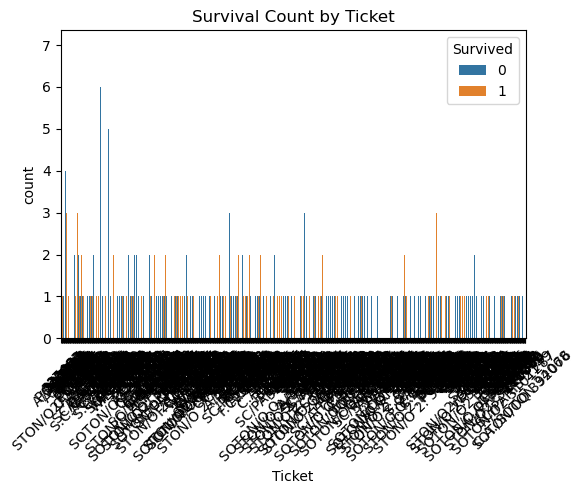

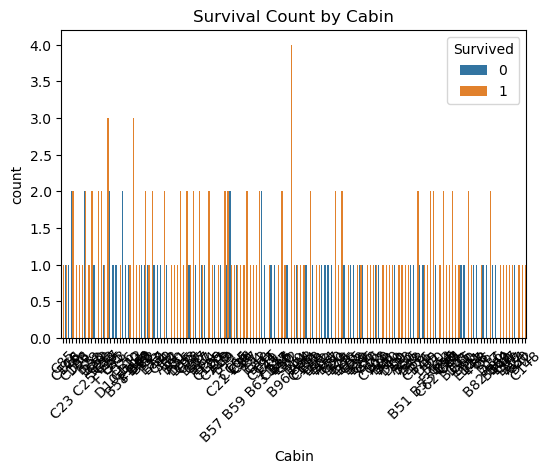

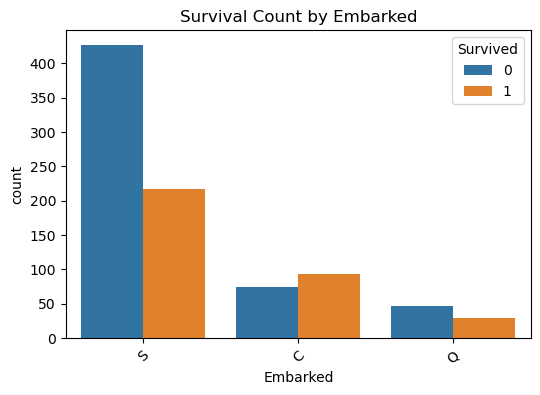

In [32]:
# Count plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="Survived", data=train_df)
    plt.title(f"Survival Count by {col}")
    plt.xticks(rotation=45)
    plt.show()

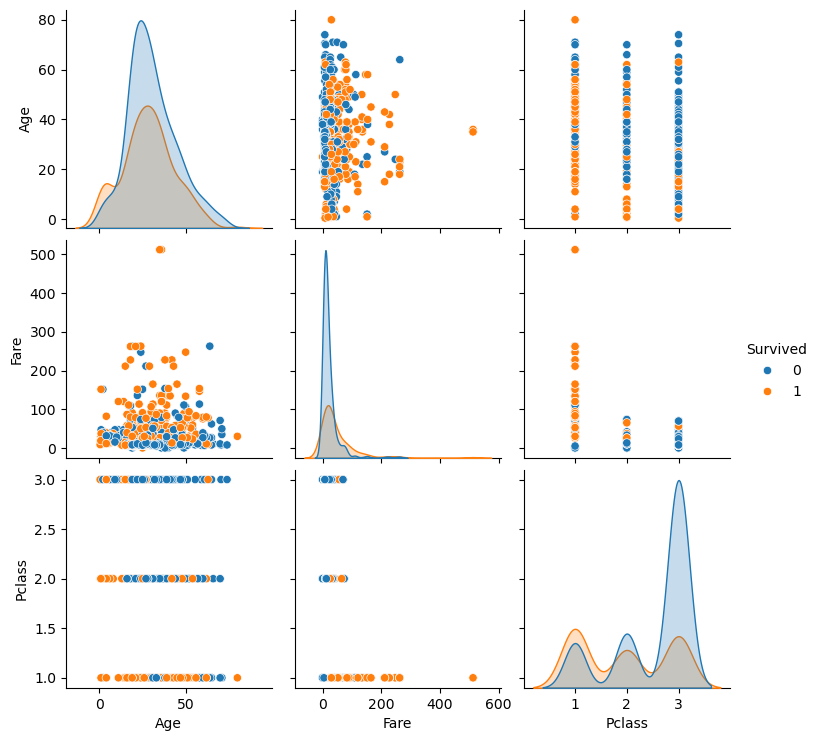

In [33]:

# Pairplot (for selected numerical features)
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']], hue="Survived")
plt.show()


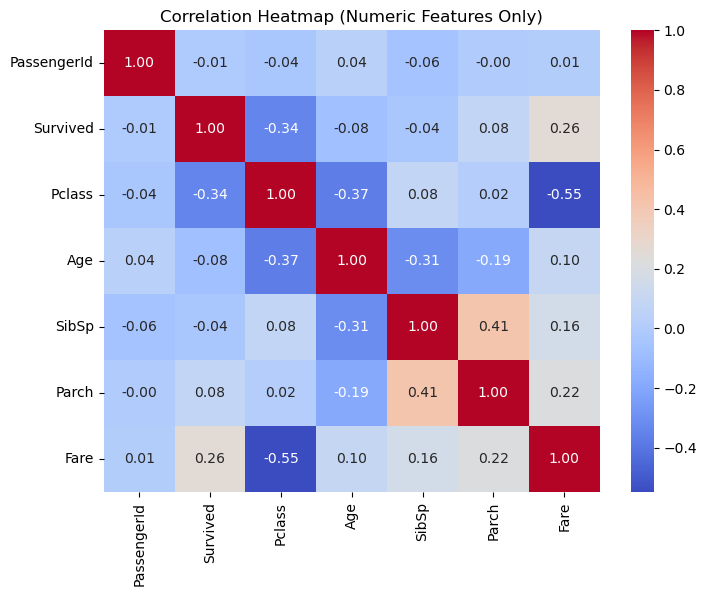

In [34]:
# ======================
# 5. Correlation Analysis
# ======================
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [35]:
# Fill Age with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill Fare with median (only test set has missing Fare)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Fill Embarked with mode (most frequent)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

print("Missing values after imputation (Train):")
print(train_df.isnull().sum())

Missing values after imputation (Train):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\munig\AppData\Local\Temp\ipykernel_11980\4257215426.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\munig\AppData\Local\Temp\ipykernel_11980\4257215426.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [36]:
# Encode 'Sex'
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' only if it exists
if 'Embarked' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

if 'Embarked' in test_df.columns:
    test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

print("After Encoding - Train Columns:", train_df.columns)
print("After Encoding - Test Columns:", test_df.columns)

After Encoding - Train Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')
After Encoding - Test Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [37]:
# Handle missing values in training data
X = train_df.drop(columns=["Survived", "Name", "Ticket", "PassengerId"], errors="ignore")
y = train_df["Survived"]

# Fill numeric NaNs with median
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Handle test data the same way
test_features = test_df.drop(columns=["Name", "Ticket", "PassengerId"], errors="ignore")
num_cols_test = test_features.select_dtypes(include=["int64", "float64"]).columns
test_features[num_cols_test] = test_features[num_cols_test].fillna(test_features[num_cols_test].median())


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Imputer: replace missing numeric values with median
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Build and fit model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_imputed, y)

print(" Model trained successfully with imputed values!")

 Model trained successfully with imputed values!


Accuracy : 0.8100558659217877
Precision: 0.7857142857142857
Recall   : 0.7432432432432432
F1-score : 0.7638888888888888
ROC-AUC  : 0.8824967824967825


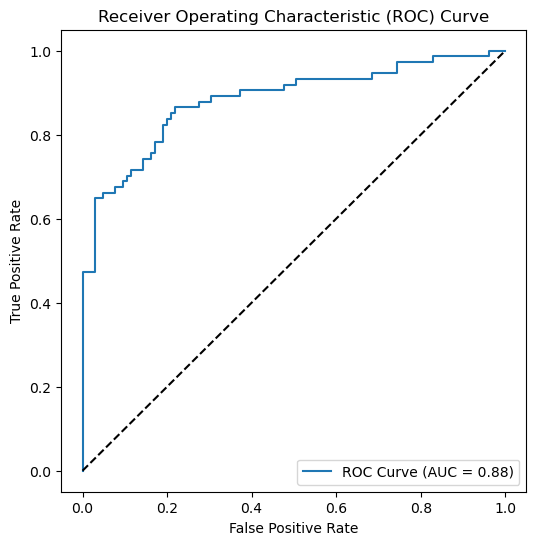

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Split data (train → train + validation sets)
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 2. Train model again on training split
model.fit(X_train, y_train)

# 3. Predictions on validation set
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]   # probabilities for ROC

# 4. Evaluation metrics
print("Accuracy :", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall   :", recall_score(y_val, y_pred))
print("F1-score :", f1_score(y_val, y_pred))
print("ROC-AUC  :", roc_auc_score(y_val, y_pred_proba))

# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.2f)" % roc_auc_score(y_val, y_pred_proba))
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [40]:
import numpy as np

# Get coefficients and odds ratios
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0],
    "Odds_Ratio": np.exp(model.coef_[0])
})

# Sort by absolute impact
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

print(coef_df)


      Feature  Coefficient  Odds_Ratio
1         Sex     2.590880   13.341503
0      Pclass    -0.938235    0.391318
7  Embarked_S    -0.400494    0.669989
3       SibSp    -0.295598    0.744086
6  Embarked_Q    -0.112345    0.893736
4       Parch    -0.108247    0.897406
2         Age    -0.030614    0.969850
5        Fare     0.002577    1.002580


In [41]:
'''Significance of features
Sex is the strongest predictor: females had much higher survival probability.
Pclass (ticket class) is also important: 1st class passengers survived more than 3rd class.
Fare has a positive effect: higher fare (wealthier passengers) slightly increased survival.
Age has a small negative effect: younger passengers survived more than older ones.
Embarked shows minor influence compared to the above features.'''

'Significance of features\nSex is the strongest predictor: females had much higher survival probability.\nPclass (ticket class) is also important: 1st class passengers survived more than 3rd class.\nFare has a positive effect: higher fare (wealthier passengers) slightly increased survival.\nAge has a small negative effect: younger passengers survived more than older ones.\nEmbarked shows minor influence compared to the above features.'

In [43]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# ========== Train the model inside app ==========
# Load dataset
train_df = pd.read_csv("D:\\Assignments questions\\Logistic Regression\\Titanic_train.csv")

# Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop unused columns
train_df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True, errors="ignore")

# Encode categorical
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Features & target
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_imputed, y)

# ========== Streamlit UI ==========
st.title("🚢 Titanic Survival Prediction App")
st.write("Enter passenger details to predict survival:")

# User inputs
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
parch = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, max_value=600.0, value=32.0)
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

# Convert categorical inputs
sex_num = 0 if sex == "male" else 1
embarked_map = {"C": [1,0], "Q": [0,1], "S": [0,0]}  
embarked_C, embarked_Q = embarked_map[embarked]

# Build input dataframe (must match training columns!)
input_df = pd.DataFrame([[
    pclass, sex_num, age, sibsp, parch, fare, embarked_C, embarked_Q
]], columns=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_C", "Embarked_Q"])

# Prediction
if st.button("Predict"):
    pred = model.predict(input_df)[0]
    proba = model.predict_proba(input_df)[0][1]

    st.subheader("Result")
    if pred == 1:
        st.success(f"✅ Passenger likely SURVIVES (Probability: {proba:.2%})")
    else:
        st.error(f"❌ Passenger likely does NOT survive (Probability: {proba:.2%})")


C:\Users\munig\AppData\Local\Temp\ipykernel_11980\3394016004.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\munig\AppData\Local\Temp\ipykernel_11980\3394016004.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [44]:
# 6. Deployment with Streamlit: link to access deployment
'''https://logisticregression-azugnj4suwat3mcgeestbd.streamlit.app/'''

'https://logisticregression-azugnj4suwat3mcgeestbd.streamlit.app/'

In [45]:
'''Precision: Of the predicted positives, how many are truly positive? (Focus = reducing false positives).

Recall: Of the actual positives, how many did the model find? (Focus = reducing false negatives).

 Precision = correctness of positive predictions.
 Recall = completeness of finding positives.'''

'Precision: Of the predicted positives, how many are truly positive? (Focus = reducing false positives).\n\nRecall: Of the actual positives, how many did the model find? (Focus = reducing false negatives).\n\n Precision = correctness of positive predictions.\n Recall = completeness of finding positives.'

In [46]:
'''Cross-Validation

A method to evaluate models by splitting data into k parts (folds).

Train on k–1 folds, test on the remaining, repeat, and average results.

Importance: Gives reliable performance estimates, reduces overfitting, and works well with small/imbalanced data.'''

'Cross-Validation\n\nA method to evaluate models by splitting data into k parts (folds).\n\nTrain on k–1 folds, test on the remaining, repeat, and average results.\n\nImportance: Gives reliable performance estimates, reduces overfitting, and works well with small/imbalanced data.'